## Background oMn concentration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import pandas as pd

%matplotlib inline

Observations:

In [2]:
dMn_CB3 = np.array([[9.89505,7.01695359], [24.7367,4.074367172], [39.5773,3.203917868], [57.3846,1.803593902], 
                    [64.3092,1.758328843], [98.9289,1.334041002], [118.709,1.528175487], [148.375,1.734083199],
                    [178.037,1.753798012], [197.81,1.747613181], [247.232,0.957648988], [474.423,0.331293486], 
                    [592.858,0.359338134], [790.098,0.365897845], [987.15,0.331800024], [1184.02,0.269111157], 
                    [1380.7,0.250814627], [1577.19,0.214804831], [1969.64,0.171546988], [2459.18,0.152629949],
                    [2947.61,0.147058424], [3434.95,0.148014942]])

dMn_CB4 = np.array([[10.0,5.861], [25.7,6.033], [39.9,5.818], [71.1,1.857], [99.8,1.265], [119.8,1.295],
                    [150.0,1.517], [220.0,1.757], [250.4,1.166], [299.9,0.690], [500.0,0.338], [600.0,0.374],
                    [800.0,0.425], [1000.1,0.565], [1232.5,0.336], [1400.8,0.304], [1600.3,0.265], [2000.6,0.221], 
                    [2500.3,0.165], [3000.2,0.158], [3500.0,0.150]])

dMn_CB2 = np.array([[10.7,5.277], [25.4,3.936], [40.2,1.672], [58.2,1.679], [65.3,1.452], [100.3,1.486], [140.3,2.009], 
                    [200.5,1.234], [300.2,0.418], [400.4,0.311], [800.2,0.348], [1000.3,0.306], [1200.5,0.328]])

In [3]:
# units: pmol / L
pMn_CB3 = np.array([[9.89505,674.0952684], [24.7367,853.3066816], [57.3846,233.4047255], [178.037,4841.507948],
                    [197.81,5127.15382], [474.423,957.305716], [790.098,840.4666579], [1380.7,363.7459108],
                    [1969.64,444.9417019], [2459.18,378.2499246], [3434.95,379.0022695]])

pMn_CB4 = np.array([[10,104.4], [25,272.8], [71,76.1], [150,1636.9], [220,2550.3], [500,1153.7], [800,1012.7],
                    [1401,679.6], [2000,483.0], [2500,537.2], [3499,1488.5]])

pMn_CB2 = np.array([[10,317.1], [25,285.1], [59,144.2], [65,454.4], [140,2868.9], [200,1851.9], [400,982.2],
                    [800,878.8], [1200,1052.5]])

Model:

In [50]:
month = 7
CB2_coord = (507, 383)
CB3_coord = (546, 456)
CB4_coord = (628, 470)

sp0 = nc.Dataset('/data/brogalla/run_storage/ANHA12_test_20210624/ANHA12_EXH006_2002_monthly.nc') # 0.8 m/day
sp1 = nc.Dataset('/data/brogalla/run_storage/ANHA12_test1_20210624/ANHA12_EXH006_2002_monthly.nc')
sp2 = nc.Dataset('/data/brogalla/run_storage/ANHA12_test2_20210624/ANHA12_EXH006_2002_monthly.nc')
# sp0 = nc.Dataset('/data/brogalla/run_storage/ANHA12_test_20210629/ANHA12_EXH006_2002_monthly.nc') # 0.4 m/day
# sp1 = nc.Dataset('/data/brogalla/run_storage/ANHA12_test1_20210629/ANHA12_EXH006_2002_monthly.nc')
# sp2 = nc.Dataset('/data/brogalla/run_storage/ANHA12_test2_20210629/ANHA12_EXH006_2002_monthly.nc')
# sp0 = nc.Dataset('/data/brogalla/run_storage/ref-spin-up0-202106/ANHA12_EXH006_2002_monthly.nc') # 1 m/day
# sp1 = nc.Dataset('/data/brogalla/run_storage/ref-spin-up1-202106/ANHA12_EXH006_2002_monthly.nc')
# sp2 = nc.Dataset('/data/brogalla/run_storage/ref-spin-up2-202106/ANHA12_EXH006_2002_monthly.nc')

dmn_sp0 = np.array(sp0.variables['dissolmn'])[month,0,:,:,:]
omn_sp0 = np.array(sp0.variables['oxidismn'])[month,0,:,:,:]
dmn_sp1 = np.array(sp1.variables['dissolmn'])[month,0,:,:,:]
omn_sp1 = np.array(sp1.variables['oxidismn'])[month,0,:,:,:]
dmn_sp2 = np.array(sp2.variables['dissolmn'])[month,0,:,:,:]
omn_sp2 = np.array(sp2.variables['oxidismn'])[month,0,:,:,:]

deptht = np.array(sp0.variables['deptht'])

Profiles:

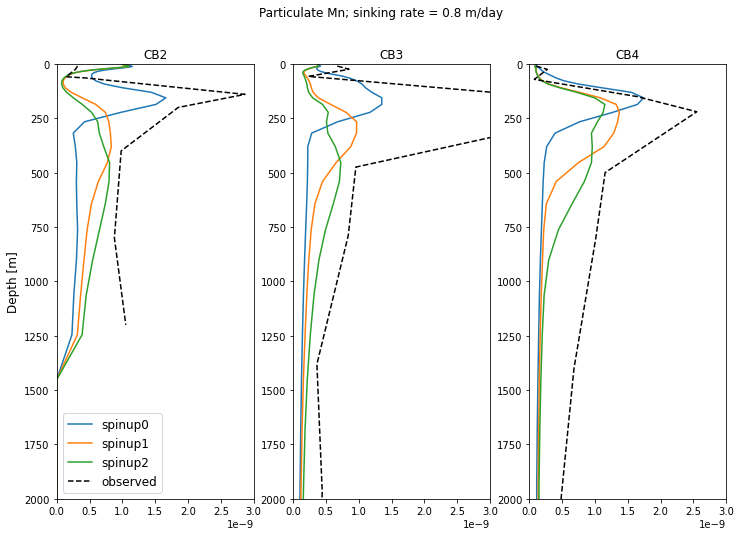

In [49]:
fig, ax = plt.subplots(1,3, figsize=(12,8))

for axis in ax:
    axis.invert_yaxis()
    axis.set_xlim([0,3e-9])
    axis.set_ylim([2000,0])

# Model:
fig.suptitle('Particulate Mn; sinking rate = 0.8 m/day')
ax[0].set_title('CB2')
ax[0].plot(omn_sp0[:,CB2_coord[0],CB2_coord[1]],  deptht, '-', label='spinup0')
ax[0].plot(omn_sp1[:,CB2_coord[0],CB2_coord[1]],  deptht, '-', label='spinup1')
ax[0].plot(omn_sp2[:,CB2_coord[0],CB2_coord[1]],  deptht, '-', label='spinup2')
ax[1].set_title('CB3')
ax[1].plot(omn_sp0[:,CB3_coord[0],CB3_coord[1]],  deptht, '-', label='spinup0')
ax[1].plot(omn_sp1[:,CB3_coord[0],CB3_coord[1]],  deptht, '-', label='spinup1')
ax[1].plot(omn_sp2[:,CB3_coord[0],CB3_coord[1]],  deptht, '-', label='spinup2')
ax[2].set_title('CB4')
ax[2].plot(omn_sp0[:,CB4_coord[0],CB4_coord[1]],  deptht, '-', label='spinup0')
ax[2].plot(omn_sp1[:,CB4_coord[0],CB4_coord[1]],  deptht, '-', label='spinup1')
ax[2].plot(omn_sp2[:,CB4_coord[0],CB4_coord[1]],  deptht, '-', label='spinup2')

# Observations:
ax[0].plot(pMn_CB2[:,1]*1e-12, pMn_CB2[:,0], '--k', label='observed')
ax[1].plot(pMn_CB3[:,1]*1e-12, pMn_CB3[:,0], '--k', label='observed')
ax[2].plot(pMn_CB4[:,1]*1e-12, pMn_CB4[:,0], '--k', label='observed')

ax[0].set_ylabel('Depth [m]', fontsize=12)
ax[0].legend(fontsize=12)

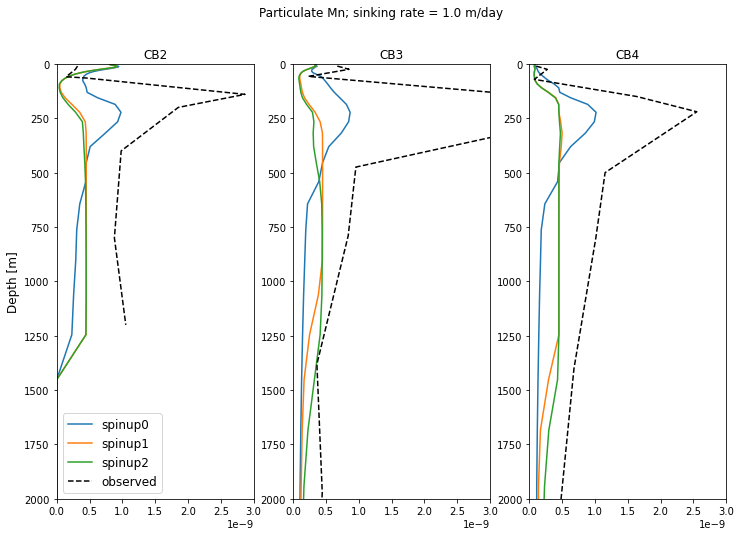

In [51]:
fig, ax = plt.subplots(1,3, figsize=(12,8))

for axis in ax:
    axis.invert_yaxis()
    axis.set_xlim([0,3e-9])
    axis.set_ylim([2000,0])

# Model:
fig.suptitle('Particulate Mn; sinking rate = 1.0 m/day')
ax[0].set_title('CB2')
ax[0].plot(omn_sp0[:,CB2_coord[0],CB2_coord[1]],  deptht, '-', label='spinup0')
ax[0].plot(omn_sp1[:,CB2_coord[0],CB2_coord[1]],  deptht, '-', label='spinup1')
ax[0].plot(omn_sp2[:,CB2_coord[0],CB2_coord[1]],  deptht, '-', label='spinup2')
ax[1].set_title('CB3')
ax[1].plot(omn_sp0[:,CB3_coord[0],CB3_coord[1]],  deptht, '-', label='spinup0')
ax[1].plot(omn_sp1[:,CB3_coord[0],CB3_coord[1]],  deptht, '-', label='spinup1')
ax[1].plot(omn_sp2[:,CB3_coord[0],CB3_coord[1]],  deptht, '-', label='spinup2')
ax[2].set_title('CB4')
ax[2].plot(omn_sp0[:,CB4_coord[0],CB4_coord[1]],  deptht, '-', label='spinup0')
ax[2].plot(omn_sp1[:,CB4_coord[0],CB4_coord[1]],  deptht, '-', label='spinup1')
ax[2].plot(omn_sp2[:,CB4_coord[0],CB4_coord[1]],  deptht, '-', label='spinup2')

# Observations:
ax[0].plot(pMn_CB2[:,1]*1e-12, pMn_CB2[:,0], '--k', label='observed')
ax[1].plot(pMn_CB3[:,1]*1e-12, pMn_CB3[:,0], '--k', label='observed')
ax[2].plot(pMn_CB4[:,1]*1e-12, pMn_CB4[:,0], '--k', label='observed')

ax[0].set_ylabel('Depth [m]', fontsize=12)
ax[0].legend(fontsize=12)